# Feed Forward Neural Networks

The goal of this notebook is to become familiar with a basic Neural Network architecture, the Feed-Forward Neural Network (FFNN). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

---------
## 1. Review of the Neural Network anatomy  


#### Input, Hidden Layers, and Output Layers

The **forward** pass through an FFNN is a sequence of linear and nonlinear operations.



<img src="figs/ffnn.png" width="70%"/>

The nonlinear function is the **Activation function**. A list of activation functions can be found [here](https://en.wikipedia.org/wiki/Activation_function).

Remember a FFNN performs a linear transformation of the data using learned weights, and then passes this linear transformation through a nonlinear function known as an **activation function**.

One choice of an activation function is the *sigmoid* function which is defined as $$\sigma(x)=\frac{1}{1+e^{-z}}$$

Remember this is the same as logistic regression!

<img src="figs/sigmoid_activation.png" width="30%"/>

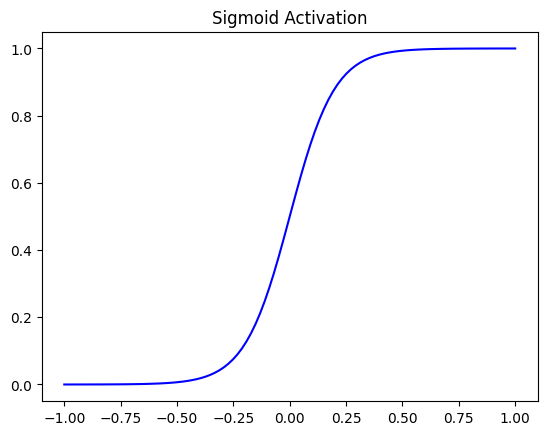

In [2]:
# Define sigmoid activation function
def sig(z):
    return 1 / (1 + np.exp(-z))


# Input vector
x_train = np.linspace(-1, 1, 100)

# We'll set the network parameters
w1, b1 = 10, 0
w2, b2 = 1, 0

# Linear operation
l1 = w1 * x_train + b1

# Sigmoid activation
h = sig(l1)

# Output layer
y_train = w2 * h + b2

plt.plot(x_train, y_train, "-b")
plt.title("Sigmoid Activation")
plt.show()

Another common choice of an activation function is the *Rectified Linear Unit* (ReLU) function defined as $$g(x)=\max(0,x)$$


<img src="figs/relu_activation.png" width="30%"/>

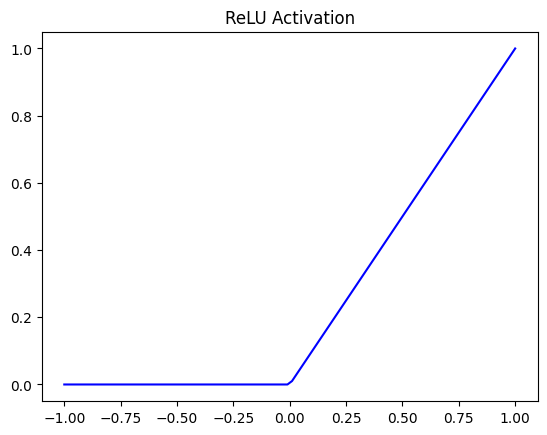

In [3]:
# Define ReLU activation function
def g(z):
    return np.maximum(0, z)


# Input vector
x_train = np.linspace(-1, 1, 100)

# We'll set the network parameters
w1, b1 = 1, 0.0
w2, b2 = 1, 0

# Linear operation
l1 = w1 * x_train + b1

# RELU activation
h = g(l1)

# Output layer
y_train = w2 * h + b2

plt.plot(x_train, y_train, "-b")
plt.title("ReLU Activation")
plt.show()

## 2. TensorFlow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


There are many powerful deep learning packages to work with neural networks like **TensorFlow** and **PyTorch**. These packages provide both the forward and back propagations, and many other other functionalities. The forward pass is used to make   predictions while the backward (back propagation)  is used to  train (optimize) a network. Training means  to find the optimal parameters for a specific task.

Here, we use TensorFlow (TF) and Keras to employ FFNN.

#### Import the toy dataset

In [4]:
data = pd.read_csv("dataset.csv")

data.head()

,x,y
0,-1.000000,0.505988
1,-0.959184,0.479407
2,-0.918367,0.504377
3,-0.877551,0.485530
4,-0.836735,0.550247


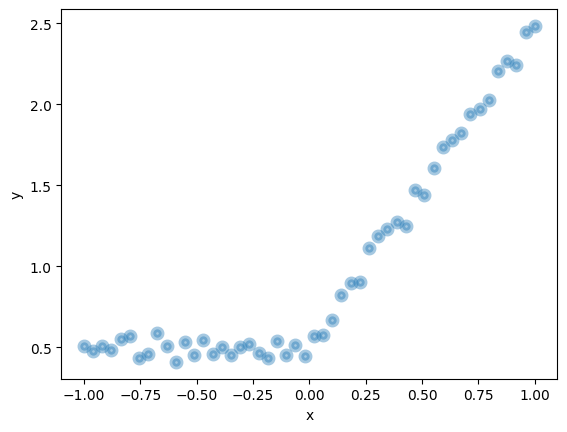

In [5]:
# Let's see what this data we are trying to predict looks like
X = data["x"]
y = data["y"]

# Plot
plt.scatter(X, y, alpha=0.4, lw=4)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Use Keras to build a FFNN
Below we will use the Keras package to first define a FFNN model. We will then use the add method to add a single hidden layer to the model with one neuron using ReLU activation.

In [6]:
model = models.Sequential(name="Single_Neuron_Model")

# Input layer, one neuron
model.add(layers.Input(shape=(1,)))

# Hidden layer with one neuron
model.add(layers.Dense(1, activation="relu"))

# Output layer with one neuron
model.add(layers.Dense(1, activation="linear"))

model.summary()

Model: "Single_Neuron_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

At this point, we haven't trained the neural network yet, it is just initialized with random weights.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


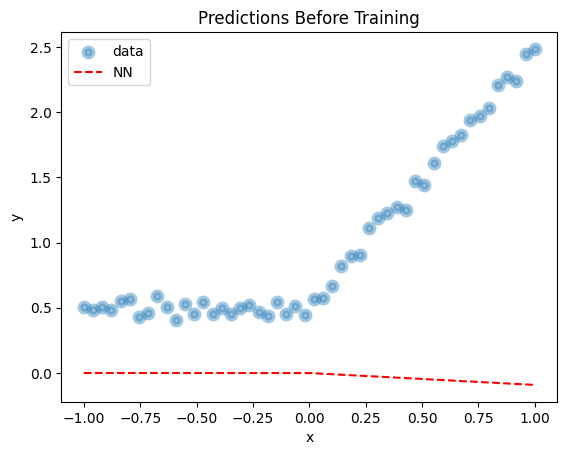

In [7]:
# Make predictions on the untrained network
x_lin = np.linspace(X.min(), X.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(X, y, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions Before Training")
plt.legend()
plt.show()

We'll let back propogation and stochastic gradient descent take it from here.

The **backward** pass is the training. This part is fairly math heavy -- it is based on the chain rule of calculus, and it calculates the gradient of the loss w.r.t. the weights. This gradient is used by the optimizer to update the weights to minimize the loss function.

<img src="figs/dl.jpg" width="70%"/>

#### Compiling the NN

`compile` is used to configure a NN model so it can be fit. We aren't ready to fit just yet, but we are compiling here because doing so reinitilizes the model weights.

`model.compile(optimizer, loss, metrics, **kwargs)`

`optimizer` - defines how the weights are updated (we'll use SGD)\
`loss` - what the model is trying to minimize\
`metric` - list of metrics to report during training process

In [8]:
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

#### Fitting the NN

`Model.fit(x=None, y=None, batch_size=None, epochs=1, verbose="auto", validation_split=0.0, validation_data=None, shuffle=True, **kwargs)`

`batch_size` - number of observations overwhich the loss is calculated before each weight update\
`epochs` - number of times the complete dataset is seen in the fitting process\
`verbose` - you can silence the training output by setting this to `0`\
`validation_split` - splits off a portion of the `x` and `y` training data to be used as validation (see warning below)\
`validation_data` - tuple designating a seperate `x_val` and `y_val` dataset\
`shuffle` - whether to shuffle the training data before each epoch

We fit the model for 100 `epochs` and set `batch_size` to 64. The results of `fit()` are then stored in a variable called `history`.  

In [9]:
# Fit model and store training histry
history = model.fit(X, y, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 1.5313
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9992
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6773
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4739
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3420
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2548
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1963
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1565
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1287
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1086
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0936
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0820
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0725
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0646
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0577
Epoch 16/100
1/1 ━

#### Plot Training History

`history.history` is a dictionary which contains information from each training epoch (no, I don't know the rationale behind the double name). Use it to plot the loss across epochs.

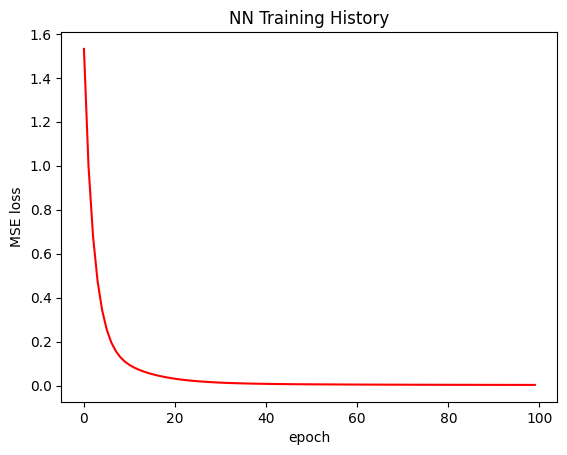

In [10]:
# Plot training history
plt.plot(history.history["loss"], c="r")
plt.ylabel("MSE loss")
plt.xlabel("epoch")
plt.title("NN Training History")
plt.show()

In [11]:
# Weights learned for the data
model.get_weights()

[array([[1.7250164]], dtype=float32),
 array([0.07980394], dtype=float32),
 array([[1.0883256]], dtype=float32),
 array([0.4804335], dtype=float32)]

#### Predict & Plot

We use the model's `predict` method on a linspace, `x_lin`, which we construct to span the range of the dataset's $x$ values. We save the resulting predictions in `y_hat`

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


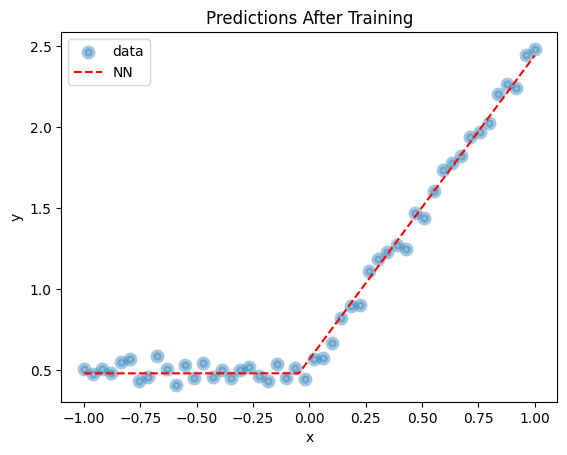

In [12]:
# Predict
x_lin = np.linspace(X.min(), X.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(X, y, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

#### An Ugly Function

Let's try using the same NN to approximate this beauty.

In [13]:
def ugly_function(x):
    if x < 0:
        return np.exp(-(x**2)) / 2 + 1 + np.exp(-((10 * x) ** 2))
    else:
        return np.exp(-(x**2)) + np.exp(-((10 * x) ** 2))

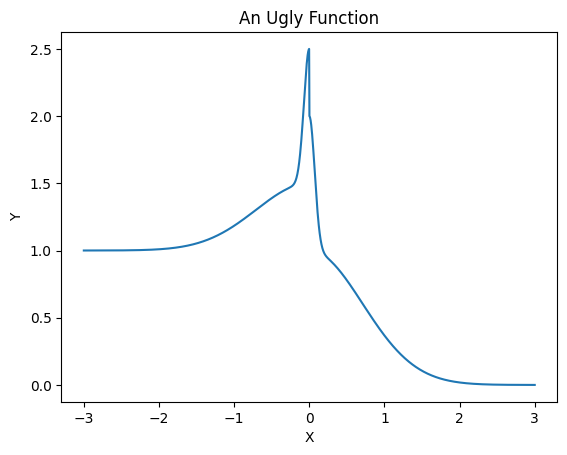

In [14]:
# Generate data
x_ugly = np.linspace(-3, 3, 1500)  # create x-values for input
y_ugly = np.array(list(map(ugly_function, x_ugly)))

# Plot data
plt.plot(x_ugly, y_ugly)
plt.title("An Ugly Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4389
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0692
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0662
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0648
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0640
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.0636
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0636
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0634
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0633
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.0636
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0632
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.0635
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.0635
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.0634
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

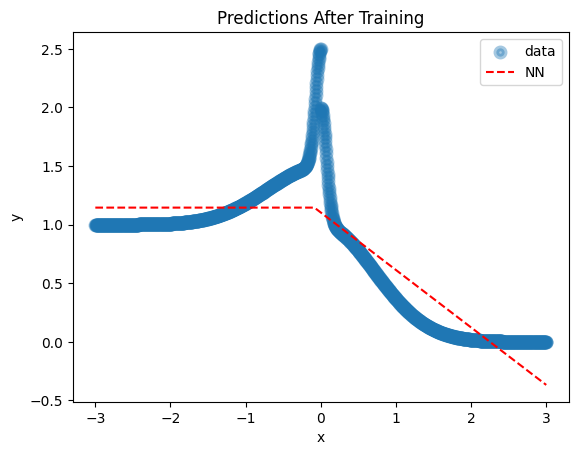

In [15]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

# Fit model and store training histry
history = model.fit(x_ugly, y_ugly, epochs=100, batch_size=64, verbose=1)

# Predict
x_lin = np.linspace(x_ugly.min(), x_ugly.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(x_ugly, y_ugly, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

We're going to need a bigger model...

Here we will build a FFNN with two hidden layers containing 16 neurons each.

In [16]:
model = models.Sequential(name="Multiple_Neuron_Model")

# Input layer, one neuron
model.add(layers.Input(shape=(1,)))

# Hidden layer 1 with sixteen neurons
model.add(layers.Dense(16, activation="relu"))

# Hidden layer 2 with sixteen neurons
model.add(layers.Dense(16, activation="relu"))

# Output layer with one neuron
model.add(layers.Dense(1, activation="linear"))

model.summary()

Model: "Multiple_Neuron_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.1928
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0468
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.0274
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.0229
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.0216
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0211
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.0204
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.0202
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0197
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.0193
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0191
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0186
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0186
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.0183
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

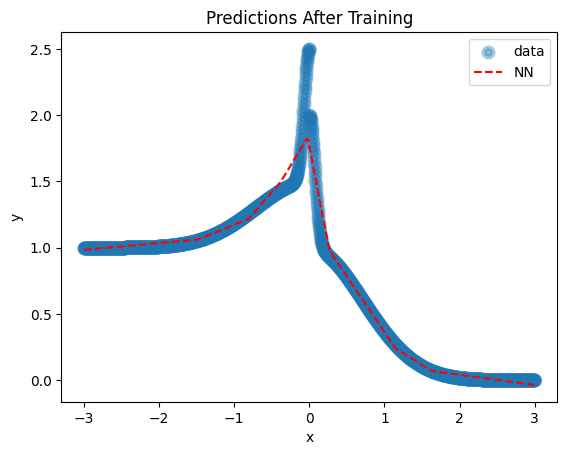

In [17]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-1), loss="mse", metrics=[])

# Fit model and store training histry
history = model.fit(x_ugly, y_ugly, epochs=100, batch_size=64, verbose=1)

# Predict
x_lin = np.linspace(x_ugly.min(), x_ugly.max(), 500)
y_hat = model.predict(x_lin)

# Plot
plt.scatter(x_ugly, y_ugly, alpha=0.4, lw=4, label="data")
plt.plot(x_lin, y_hat, label="NN", ls="--", c="r")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions After Training")
plt.legend()
plt.show()

## 3. PyTorch Implementation: Extra Material

PyTorch is another library used to build, train, and deploy deep learning models. I think Tensorflow / Keras is more intuitive, but PyTorch is the industry standard for most NN problems.

A great PyTorch tutorial for an FFNN implementation can be found at: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


- In PyTorch we have to define everything as torch tensors  instead of numpy matrices 
- Though, we can transform numpy objects to pytorch tensors by using: **torch.from_numpy(np_array)**

In [18]:
# Create an input vector using PyTorch
x = torch.linspace(-10, 10, 1000)
print("PyTorch tensor: ", x.size())

# Note how this is nearly the same as using Numpy
x_ = np.linspace(-10, 10, 1000)
print("Numpy array: ", x_.shape)

# Convert a numpy array to a PyTorch tensor
x = torch.from_numpy(x_)
print("from numpy to PyTorch: ", x.size())

PyTorch tensor:  torch.Size([1000])
Numpy array:  (1000,)
from numpy to PyTorch:  torch.Size([1000])


Define the input tensor: 
- Specify the type 
- Reshape or unsqueeze. This is what pytorch wants to get

In [19]:
x = torch.linspace(-10, 10, 1000, dtype=torch.float)
print("PyTorch Tensor: ", x.size())

# x=x.reshape(-1,1)
x = x.unsqueeze(-1)

print("Reshaped tensor: ", x.size())

PyTorch Tensor:  torch.Size([1000])
Reshaped tensor:  torch.Size([1000, 1])


 #### PyTorch also provides a sequential functionality
 
 Build the network architecture

In [20]:
model_p = torch.nn.Sequential(
    torch.nn.Linear(1, 10), torch.nn.ReLU(), torch.nn.Linear(10, 1)
)

print(model_p)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


**Forward pass**

To perform a forward pass in PyTorch, you pass the data directly to the model as an argument. 

In [21]:
y_p = model_p(x)

Trying to operate tensors may cause problems. For example, try to plot them 

In [22]:
# plt.plot(x, y_p)

We can convert PyTorch tensors to numpy by using: **torchTensor.detach().numpy()** 

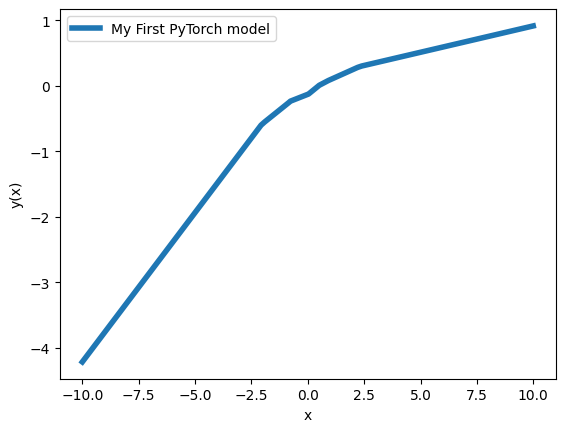

In [23]:
x_ = x.detach().numpy()
y_ = y_p.detach().numpy()

plt.plot(x_, y_, linewidth=4, label="My First PyTorch model")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()

**A deeper network**

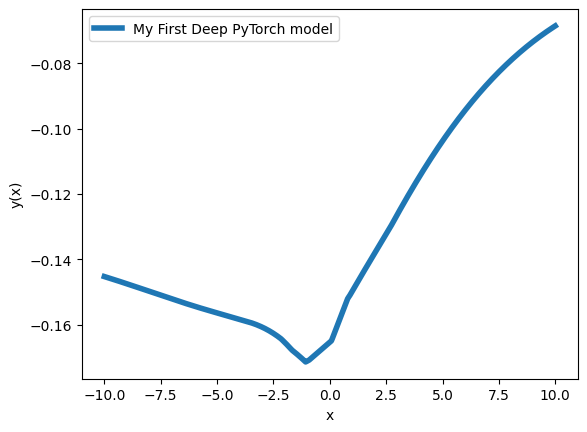

In [24]:
model_p2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 20),
    torch.nn.Sigmoid(),
    torch.nn.Linear(20, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 1),
)

y_p2 = model_p2(x)

x2_ = x.detach().numpy()
y2_ = y_p2.detach().numpy()

plt.plot(x2_, y2_, linewidth=4, label="My First Deep PyTorch model")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()